In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pybeataml.load_data_from_synpase import load_file

Welcome, James Pino!



In [2]:
import pybeataml.alluvial as alluvial
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from scipy.stats import fisher_exact

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['font.family'] = ['arial']
matplotlib.rcParams['font.size'] = 6

sns.set_theme(context ='paper',
    palette="Paired",
    style='white',
    font='arial',
    font_scale=1.0)

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
cluster_labels = pd.read_csv('wg_cluster_assignments.txt', delimiter='\t')


In [7]:
cluster_labels.head()

,Barcode.ID,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10
C3L.04971,C3L.04971,1,1,1,1,1,1,1,1,1
C3L.00458,C3L.00458,1,1,1,1,1,1,1,1,1
C3L.05887,C3L.05887,1,1,1,3,1,3,4,4,4
C3L.06952,C3L.06952,1,1,1,3,4,3,4,4,4
C3L.06541,C3L.06541,1,3,4,4,5,6,6,6,8


In [8]:
pd.set_option("display.precision", 3)

In [9]:
merged_meta = load_file("syn52119979", delimiter='\t')

# meta_info = load_file("syn51080395", delimiter=',')

In [10]:
merged_meta.head()

,Participant,Type,Plex,Channel,Parent.Sample,Aliquot.1,Aliquot.2,Analysis,Note,Mixture,Batch,MS.Use,WGS.Normal,WGS.Tumor,WES.Normal,WES.Tumor,WGS.Normal.bamID,WGS.Tumor.bamID,WES.Normal.bamID,WES.Tumor.bamID,RNA.sample,Genomic.Availability,Label,Genomic.Use,Transcriptomic.Use,miRNA.Use,MS.RNA.Match.Use,Metabolomics.Use,Lipidomics.Use,Ploidy,Purity,Consent.sex,Consent.age,Consent.race,Consent.ethnicity,Consent.participant.country,FAB,classification,ELN_classification,ABL1-BCR.mutation.status,ASXL1.mutation.status,BCOR.mutation.status,BCORL1.mutation.status,BRAF.mutation.status,CBFB-MYH11.mutation.status,CBL.mutation.status,CEBPA.mutation.status,CSF3R.mutation.status,CUX1.mutation.status,DEK-NUP214.mutation.status,DNMT3A.mutation.status,ETV6.mutation.status,EZH2.mutation.status,FBXW7.mutation.status,FLT3.mutation.status,FOXP1.mutation.status,GATA2.mutation.status,IDH1.mutation.status,IDH2.mutation.status,IGSF10.mutation.status,JAK2.mutation.status,KIT.mutation.status,KMT2A-Fusions.mutation.status,KMT2A-MLLT3.mutation.status,KRAS.mutation.status,MAML1-MYB.mutation.status,MED12L-start-loss.mutation.status,MLLT10-Other.mutation.status,NF1.mutation.status,NPM1.mutation.status,NRAS.mutation.status,PHF6.mutation.status,PML-RARA.mutation.status,PTEN.mutation.status,PTPN11.mutation.status,RAD21.mutation.status,RUNX1.mutation.status,RUNX1-RUNX1T1.mutation.status,SETBP1.mutation.status,SF3B1.mutation.status,SMC1A.mutation.status,SMC3.mutation.status,SRSF2.mutation.status,STAG2.mutation.status,TET2.mutation.status,TP53.mutation.status,WT1.mutation.status,ZEB2.mutation.status,ZRSR2.mutation.status,FLT3_ITD.mutation.status,FLT3_TKD.mutation.status,NPM1_Subtype,NPM1_Subclonal,RBC_score,isRBCcontam,ABL1-BCR.mutation,ASXL1.mutation,BCOR.mutation,BCORL1.mutation,BRAF.mutation,CBFB-MYH11.mutation,CBL.mutation,CEBPA.mutation,CSF3R.mutation,CUX1.mutation,DEK-NUP214.mutation,DNMT3A.mutation,ETV6.mutation,EZH2.mutation,FBXW7.mutation,FLT3.mutation,FOXP1.mutation,GATA2.mutation,IDH1.mutation,IDH2.mutation,IGSF10.mutation,JAK2.mutation,KIT.mutation,KMT2A-Fusions.mutation,KMT2A-MLLT3.mutation,KRAS.mutation,MAML1-MYB.mutation,MED12L-start-loss.mutation,MLLT10-Other.mutation,NF1.mutation,NPM1.mutation,NRAS.mutation,PHF6.mutation,PML-RARA.mutation,PTEN.mutation,PTPN11.mutation,RAD21.mutation,RUNX1.mutation,RUNX1-RUNX1T1.mutation,SETBP1.mutation,SF3B1.mutation,SMC1A.mutation,SMC3.mutation,SRSF2.mutation,STAG2.mutation,TET2.mutation,TP53.mutation,WT1.mutation,ZEB2.mutation,ZRSR2.mutation,FLT3_ITD.mutation,chr11p.cnv,chr11q.cnv,chr12p.cnv,chr17p.cnv,chr17q.cnv,chr19p.cnv,chr19q.cnv,chr21p.cnv,chr21q.cnv,chr22p.cnv,chr22q.cnv,chr4p.cnv,chr4q.cnv,chr5p.cnv,chr5q.cnv,chr7p.cnv,chr7q.cnv,chr8p.cnv,chr8q.cnv
0,C3L.00458,peripheral blood,1.0,128N,C3L.00458.58,C3L.00458.58,C3L.00458.60,Proteogenomic,NaN,01CPTAC_AML,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C3L.00458.58.PB,False,False,NaN,True,False,False,1.947,0.645,Female,39,NaN,NaN,Russia,M0,sAML1,Adverse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,other,0,0.341,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missense_Mutation;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,loss;,loss;,NaN,NaN
1,C3L.03493,bone marrow,1.0,133C,C3L.03493.57,C3L.03493.57,C3L.03493.58,Proteogenomic,NaN,01CPTAC_AML,1.0,True,CPT0201510002,CPT0201410002,CPT0201510002,CPT0201410002,a76f4c04-d156-48ae-a49e-59200fbe2315,690c7e00-d487-4d12-973f-7a0fa1e94eb4,2b57bf62-bfa7-4f9f-a2f5-985fd8b85e32,7833029e-f8e7-4481-9b5d-46141e8ba4b1,bone marrow,Complete,C3L.03493.57.BMA,True,True,False,True,True,True,2.000,0.951,Male,65,NaN,NaN,Russia,M2,WHO2,Adverse,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,committed_like,0,0.625,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In

In [11]:
subtypes_merged = merged_meta.set_index('Participant').join(cluster_labels, )
subtypes_merged.dropna(subset=['k=8'], inplace=True)
mutations_cols = [i for i in subtypes_merged.columns if 'mutation.status' in i]
for i in mutations_cols:
    subtypes_merged[i] = subtypes_merged[i].astype(bool)

In [12]:
subtypes_merged.columns.values

array(['Type', 'Plex', 'Channel', 'Parent.Sample', 'Aliquot.1',
       'Aliquot.2', 'Analysis', 'Note', 'Mixture', 'Batch', 'MS.Use',
       'WGS.Normal', 'WGS.Tumor', 'WES.Normal', 'WES.Tumor',
       'WGS.Normal.bamID', 'WGS.Tumor.bamID', 'WES.Normal.bamID',
       'WES.Tumor.bamID', 'RNA.sample', 'Genomic.Availability', 'Label',
       'Genomic.Use', 'Transcriptomic.Use', 'miRNA.Use',
       'MS.RNA.Match.Use', 'Metabolomics.Use', 'Lipidomics.Use', 'Ploidy',
       'Purity', 'Consent.sex', 'Consent.age', 'Consent.race',
       'Consent.ethnicity', 'Consent.participant.country', 'FAB',
       'classification', 'ELN_classification', 'ABL1-BCR.mutation.status',
       'ASXL1.mutation.status', 'BCOR.mutation.status',
       'BCORL1.mutation.status', 'BRAF.mutation.status',
       'CBFB-MYH11.mutation.status', 'CBL.mutation.status',
       'CEBPA.mutation.status', 'CSF3R.mutation.status',
       'CUX1.mutation.status', 'DEK-NUP214.mutation.status',
       'DNMT3A.mutation.status', 'ETV6.

In [13]:
subtypes_merged['Ploidy']

C3L.00452    2.017
C3L.00453    1.987
C3L.00455    2.000
C3L.00458    1.947
C3L.00458    1.947
C3L.00459    1.953
C3L.00540    1.953
C3L.00614    2.000
C3L.00810    2.000
C3L.01182    1.883
C3L.01182    1.883
C3L.01187    2.000
C3L.01187    2.000
C3L.01188    2.000
C3L.01201    1.946
C3L.01201    1.946
C3L.01202    2.050
C3L.01291    2.000
C3L.01295    2.000
C3L.01425    2.000
C3L.01425    2.000
C3L.01426    1.925
C3L.01427    2.231
C3L.01694    2.000
C3L.01696    2.000
C3L.01700    2.000
C3L.02135    2.000
C3L.02136    2.000
C3L.02779    2.000
C3L.03303    2.000
C3L.03308    1.948
C3L.03491    2.000
C3L.03493    2.000
C3L.03496    2.000
C3L.03506    2.000
C3L.03506    2.000
C3L.03508    1.988
C3L.03508    1.988
C3L.03510    2.048
C3L.03510    2.048
C3L.04231    2.000
C3L.04231    2.000
C3L.04236    2.000
C3L.04236    2.000
C3L.04242    2.000
C3L.04244    2.000
C3L.04250    2.000
C3L.04263    2.019
C3L.04265    1.994
C3L.04269    2.000
C3L.04269    2.000
C3L.04270    1.844
C3L.04270   

In [14]:
['ELN_classification', 'Consent.participant.country']

['ELN_classification', 'Consent.participant.country']

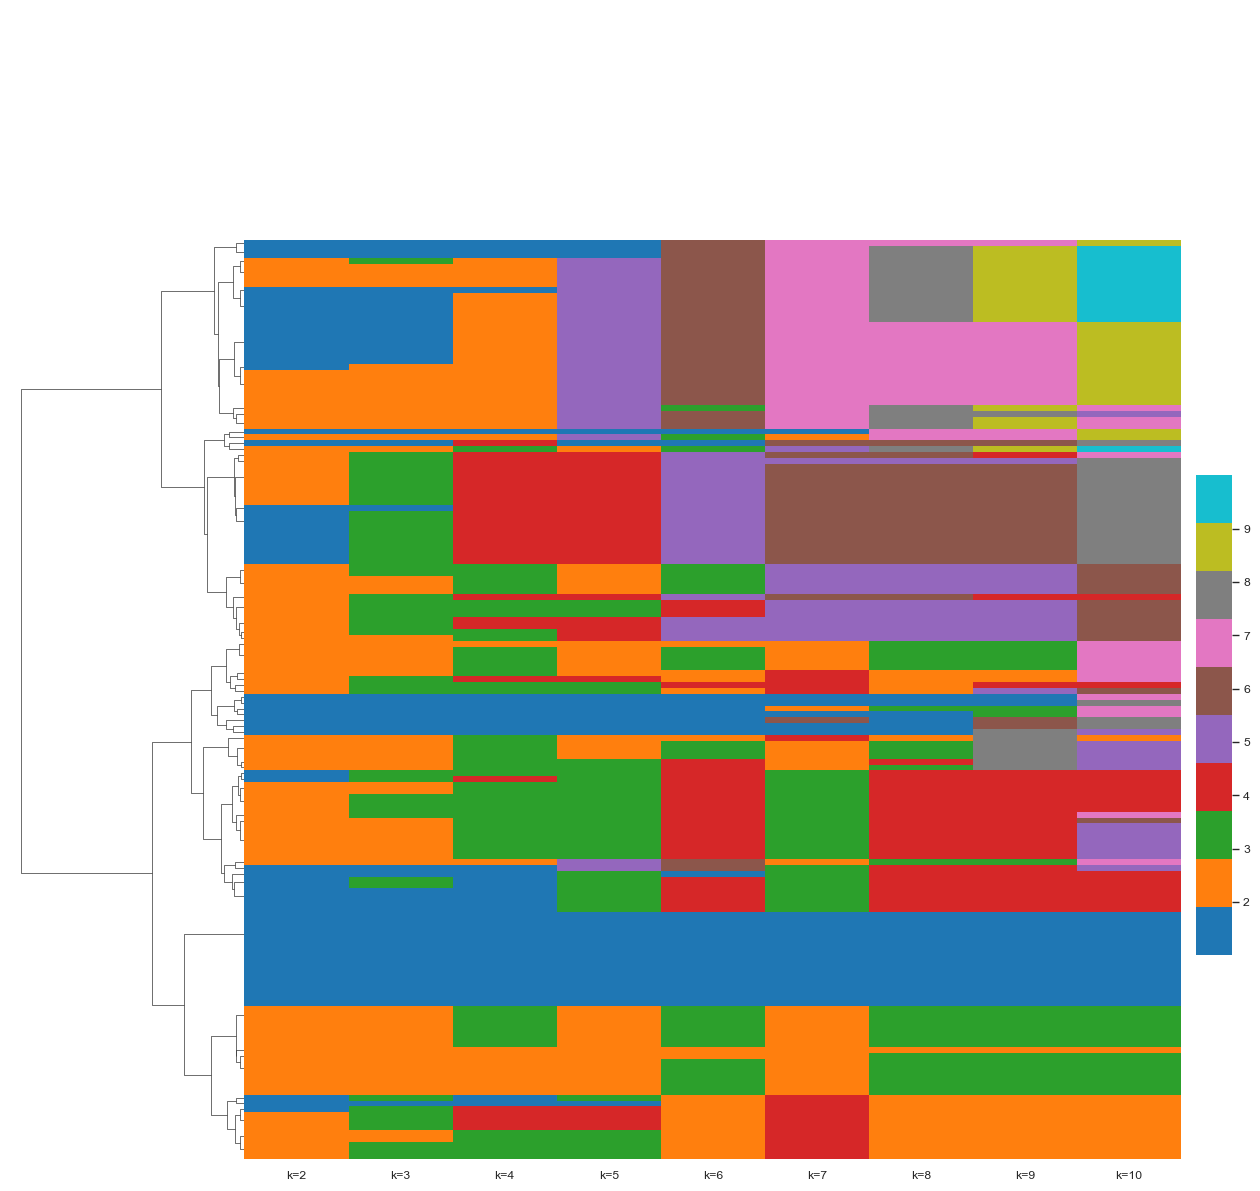

In [15]:
cl = cluster_labels.drop('Barcode.ID', axis=1).copy()
sns.clustermap(
    cl.sort_values('k=9'),
    figsize=(12,12),
    col_cluster=False,
    row_cluster=True,
    method='ward',
    cmap='tab10',
#     metric='hamming',
    cbar_kws={"ticks":range(2, 10)},
    cbar_pos=(1., .2, .03, .4),
    yticklabels=False,
);
plt.savefig("subtype_reoccurs_wg.png", dpi=300, bbox_inches='tight')

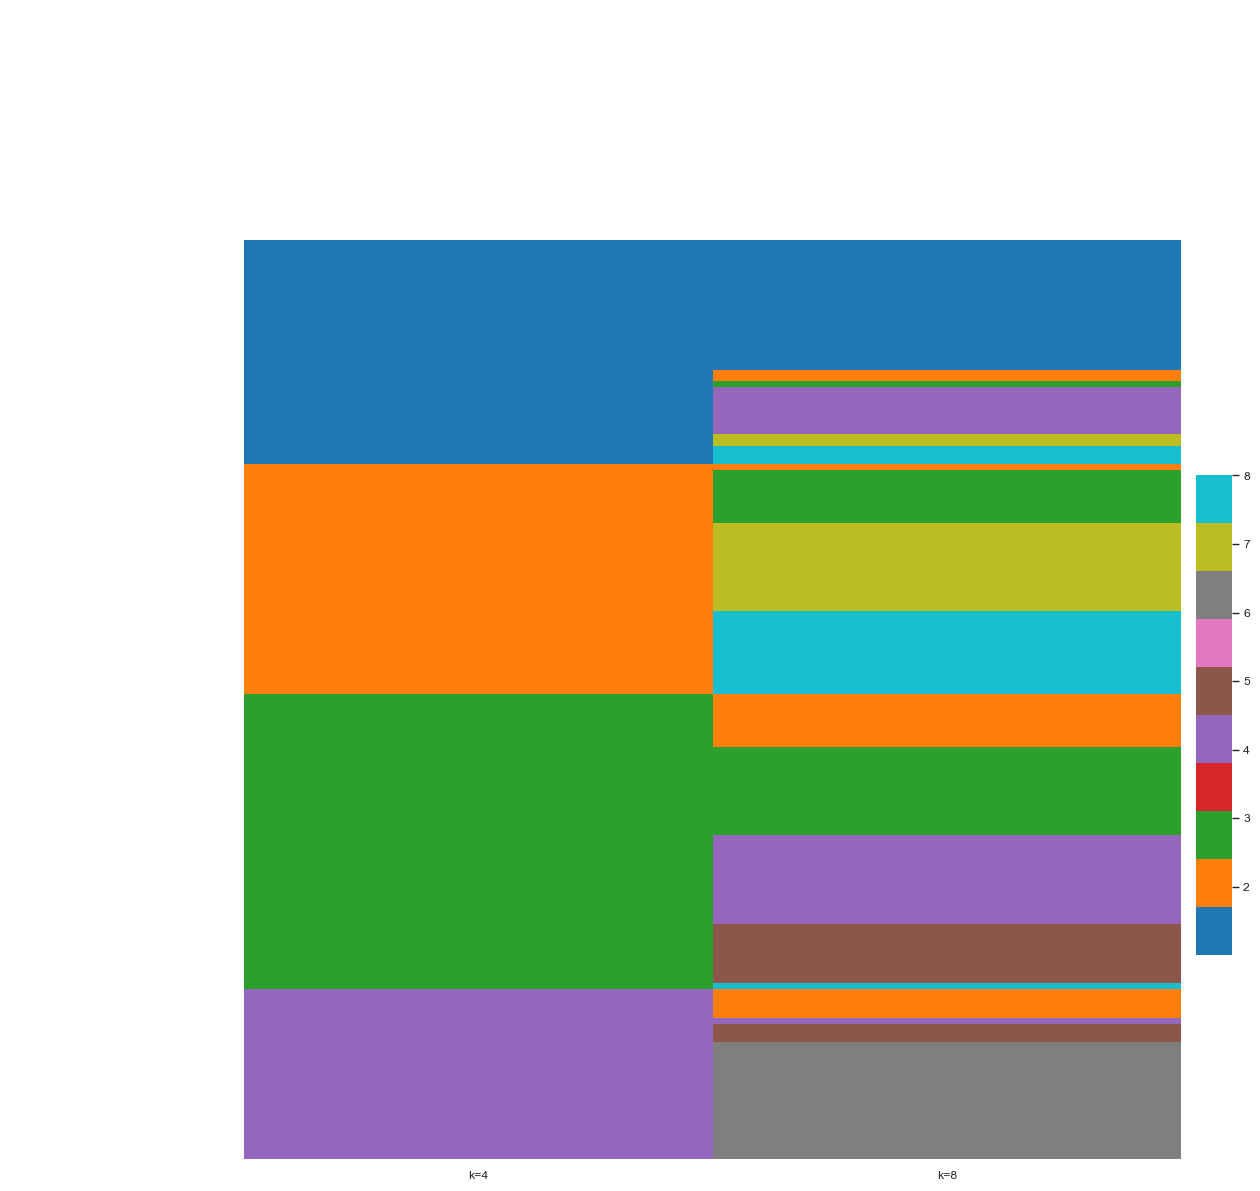

In [16]:
sns.clustermap(
    cl[['k=4', 'k=8']].sort_values(['k=4', 'k=8']),
    figsize=(12,12),
    col_cluster=False,
    row_cluster=False,
    method='ward',
    cmap='tab10',
    metric='hamming',
    cbar_kws={"ticks":range(2, 10)},
    cbar_pos=(1., .2, .03, .4),
    yticklabels=False,
);
plt.savefig("subtype_reoccurs_wg_4_8.png", dpi=300, bbox_inches='tight')

In [17]:


counts = {}
for i, df in cl[['k=4', 'k=8']].groupby(['k=4'], sort=True):
    df['k1=8'] = 'c8_'+ df['k=8'].astype(str)
    counts['c4_'+str(i)] = df['k1=8'].value_counts().to_dict()


In [18]:
counts_flat = []
for i, df in cl[['k=3', 'k=5']].groupby(['k=3'], sort=True):    
    i-=1
    for key, value in df['k=5'].value_counts().to_dict().items():
        counts_flat.append([i, key-1+3, value])
        
for i, df in cl[['k=5', 'k=8']].groupby(['k=5'], sort=True):
    i-=1
    for key, value in df['k=8'].value_counts().to_dict().items():
        counts_flat.append([i+3, key-1+3+5, value])
        
counts_flat = pd.DataFrame(counts_flat, columns=['source', 'target', 'count'])
counts_flat

,source,target,count
0,0,3,29
1,0,7,14
2,0,5,5
3,0,6,1
4,1,4,29
5,1,7,17
6,1,5,13
7,1,6,1
8,2,6,27
9,2,5,17


In [ ]:
labels = []
for i in range(1, 4):
    labels.append(f'c3_{i}')
for i in range(1, 6):
    labels.append(f'c5_{i}')
for i in range(1, 9):
    labels.append(f'c8_{i}')

,source,target,count
0,0,3,29
1,0,7,14
2,0,5,5
3,0,6,1
4,1,4,29
5,1,7,17
6,1,5,13
7,1,6,1
8,2,6,27
9,2,5,17


In [24]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Sankey(
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(color = "black", width = 0.5),
            label = labels,
            #       color = "blue"
        ),
        link = dict(
            source = counts_flat['source'], 
            target =counts_flat['target'],
            value = counts_flat['count'],
            label = counts_flat['count']
        )
    )
         ]
)

fig.update_layout(title_text="Subtype tracking", font_size=10)
# fig.write_image("cluster_tracking.png") 
#fig.show()

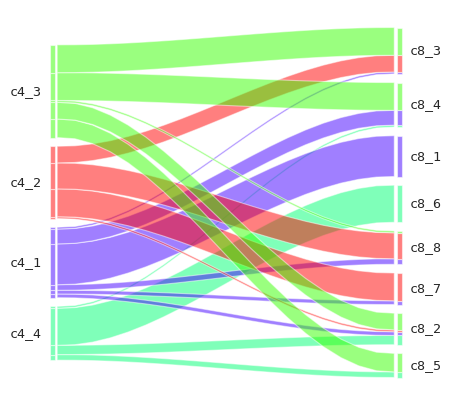

In [21]:
ax = alluvial.plot(counts)
fig = ax.get_figure()
fig.set_size_inches(5,5)
plt.savefig('alluvial_grouped_4_8.png', bbox_inches='tight', dpi=300)

{1: 22, 4: 8, 8: 3, 2: 2, 7: 2, 3: 1}
{7: 15, 8: 14, 3: 9, 2: 1}
{4: 15, 3: 15, 5: 10, 2: 9, 8: 1}
{6: 20, 2: 5, 5: 3, 4: 1}


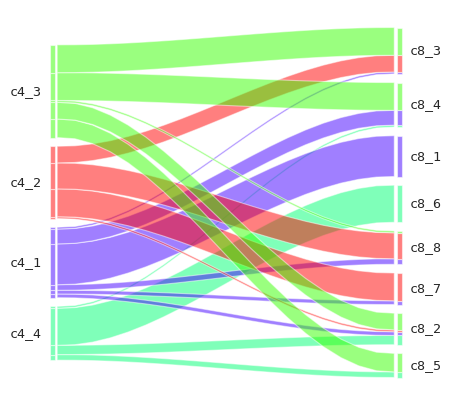

In [22]:


counts = {}
for i, df in cl[['k=4', 'k=8']].groupby(['k=4'], sort=True):
    print(df['k=8'].value_counts().to_dict())
    df['k=8'] = 'c8_'+ df['k=8'].astype(str)
    counts['c4_'+str(i)] = df['k=8'].value_counts().to_dict()

ax = alluvial.plot(counts)
fig = ax.get_figure()
fig.set_size_inches(5,5)
plt.savefig('alluvial_grouped_4_8.png', bbox_inches='tight', dpi=300)
plt.show()

In [23]:
counts = {}

for i, df in cl[['k=3', 'k=5']].groupby(['k=3'], sort=True):
    print(df['k=5'].value_counts().to_dict())
    df['k=5'] = 'c5_'+ df['k=5'].astype(str)
    counts['c3_'+str(i)] = df['k=5'].value_counts().to_dict()
    
for i, df in cl[['k=5', 'k=8']].groupby(['k=5'], sort=True):
    print(df['k=8'].value_counts().to_dict())
    df['k=8'] = 'c8_'+ df['k=8'].astype(str)
    counts['c5_'+str(i)] = df['k=8'].value_counts().to_dict()
counts

{1: 29, 5: 14, 3: 5, 4: 1}
{2: 29, 5: 17, 3: 13, 4: 1}
{4: 27, 3: 17, 2: 2, 5: 1}
{1: 22, 7: 2, 8: 2, 2: 1, 6: 1, 3: 1}
{3: 22, 5: 5, 2: 3, 8: 1}
{4: 23, 2: 8, 5: 3, 3: 1}
{6: 19, 2: 5, 5: 5}
{7: 15, 8: 15, 4: 1, 3: 1}


{'c3_1': {'c5_1': 29, 'c5_5': 14, 'c5_3': 5, 'c5_4': 1},
 'c3_2': {'c5_2': 29, 'c5_5': 17, 'c5_3': 13, 'c5_4': 1},
 'c3_3': {'c5_4': 27, 'c5_3': 17, 'c5_2': 2, 'c5_5': 1},
 'c5_1': {'c8_1': 22, 'c8_7': 2, 'c8_8': 2, 'c8_2': 1, 'c8_6': 1, 'c8_3': 1},
 'c5_2': {'c8_3': 22, 'c8_5': 5, 'c8_2': 3, 'c8_8': 1},
 'c5_3': {'c8_4': 23, 'c8_2': 8, 'c8_5': 3, 'c8_3': 1},
 'c5_4': {'c8_6': 19, 'c8_2': 5, 'c8_5': 5},
 'c5_5': {'c8_7': 15, 'c8_8': 15, 'c8_4': 1, 'c8_3': 1}}

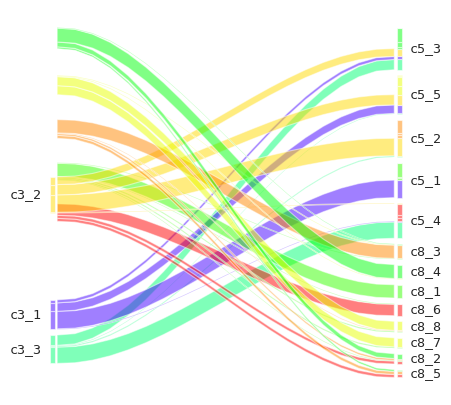

In [24]:
ax = alluvial.plot(counts)
fig = ax.get_figure()
fig.set_size_inches(5,5)
plt.savefig('alluvial_grouped_5_8.png', bbox_inches='tight', dpi=300)
plt.show()

{1: 29, 5: 15, 4: 11, 3: 10}
{2: 31, 3: 25, 4: 18, 5: 17}


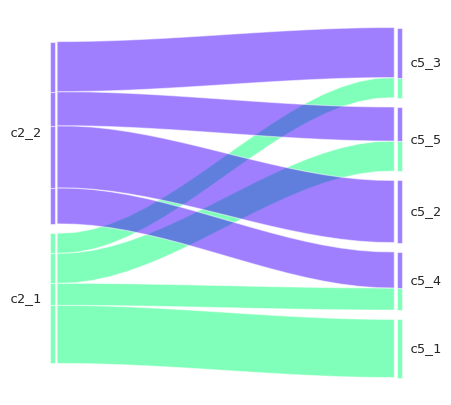

In [25]:
counts = {}
for i, df in cl[['k=2', 'k=5']].groupby(['k=2'], sort=True):
    print(df['k=5'].value_counts().to_dict())
    df['k=5'] = 'c5_'+ df['k=5'].astype(str)
    counts['c2_'+str(i)] = df['k=5'].value_counts().to_dict()
counts
ax = alluvial.plot(counts)
fig = ax.get_figure()
fig.set_size_inches(5,5)
plt.savefig('alluvial_grouped_2_5.png', bbox_inches='tight', dpi=300)
plt.show()

In [26]:

def cat_enrichment(cluster_num_index, subtype_number, dataset, subtype, non_subtype,  variable_col):
    variables_to_check = dataset[variable_col].unique()
    results = []
    for i in variables_to_check:
        pos_for_subtype = subtype.loc[subtype[variable_col] == i].shape[0]
        total_for_subtype =  subtype.shape[0]
        pos_for_non_subtype = non_subtype.loc[non_subtype[variable_col]==i].shape[0]
        total_for_non_subtype = non_subtype.shape[0]

        table = [[pos_for_subtype, pos_for_non_subtype],
                 [total_for_subtype, total_for_non_subtype]]
        table = np.array(table)
        stat, p_val = fisher_exact(table, alternative='less')
        results.append([cluster_num_index, subtype_number, variable_col+'_'+str(i), stat, p_val])
    results = pd.DataFrame(results, columns=['cluster_num_index', 'subtype_number','variable_name', 'enrichment', 'p_value'])
    return results

def calculate_enrichment(cluster_num_index, subtype_number, variable_name):

    subset_to_check = subtypes_merged[[cluster_num_index, variable_name]].dropna(subset=[variable_name]).copy()

    if subset_to_check.shape[0] < 50:
        return pd.DataFrame()
    # print(subset_to_check.head())
    subtype = subset_to_check.loc[subset_to_check[cluster_num_index] ==subtype_number]
    non_subtype = subset_to_check.loc[subset_to_check[cluster_num_index] !=subtype_number]
    col_type = subtype[variable_name].dtype

    if col_type == bool:
        pos_for_subtype = subtype[subtype[variable_name]].shape[0]
        total_for_subtype =  subtype.shape[0]
        pos_for_non_subtype = non_subtype[non_subtype[variable_name]].shape[0]
        total_for_non_subtype = non_subtype.shape[0]

        table = [[pos_for_subtype, pos_for_non_subtype],
                 [total_for_subtype, total_for_non_subtype]]
        table = np.array(table)
        stat, pval = fisher_exact(table, alternative='less')
        return pd.DataFrame([[cluster_num_index, subtype_number, variable_name, stat, pval,]],
                            columns=['cluster_num_index', 'subtype_number', 'variable_name', 'enrichment', 'p_value'])

    elif pd.api.types.is_string_dtype(col_type):
        return cat_enrichment(cluster_num_index, subtype_number, subset_to_check, subtype, non_subtype, variable_name)
    else:
        print(variable_name)
        return pd.DataFrame()

def calculate_for_cluster_size(cluster_size, variable_name):
    results = []
    for i in subtypes_merged[cluster_size].unique():
        res_df = calculate_enrichment(cluster_size, i, variable_name)
        results.append(res_df)
    return pd.concat(results, ignore_index=True)

def gather_enrichment(variables):
    results = pd.DataFrame()
    for i in range(2, 10):
        k = f'k={i}'
        results_storage = [results]
        for var in variables:
            r1 = calculate_for_cluster_size(k, var)
            results_storage.append(r1)

        results = pd.concat(results_storage, ignore_index=True)
    return results


In [27]:
cols_of_interest = ['classification', 'Consent.participant.country', 'ELN_classification', 'FAB']
cols_of_interest += mutations_cols

results = gather_enrichment(variables=cols_of_interest)

In [28]:
results

,cluster_num_index,subtype_number,variable_name,enrichment,p_value
0,k=2,1.0,classification_WHO1,1.494,0.956
1,k=2,1.0,classification_sAML1,0.566,0.222
2,k=2,1.0,classification_WHO2,0.524,0.101
3,k=2,1.0,classification_mNOS,0.113,0.011
4,k=2,1.0,classification_No,0.934,0.621
...,...,...,...,...,...
3603,k=9,6.0,FLT3_TKD.mutation.status,1.420,0.831
3604,k=9,9.0,FLT3_TKD.mutation.status,0.605,0.392
3605,k=9,2.0,FLT3_TKD.mutation.status,1.044,0.674
3606,k=9,5.0,FLT3_TKD.mutation.status,1.317,0.791


In [29]:
results['variable_name'] = results.variable_name.str.split('.mutation').str.get(0)

In [30]:
for i, df in results.sort_values('cluster_num_index').groupby('cluster_num_index'):
    df = df.loc[df.p_value<0.05]
    if df.shape[0]>0:
        # print(df.sort_values('subtype_number')[['cluster_num_index', 'subtype_number', 'variable_name', 'p_value']])
        # print(i, df.shape[0])
        if i == 'k=8':
            print(df.sort_values('subtype_number')[['cluster_num_index', 'subtype_number', 'variable_name', 'p_value']])

     cluster_num_index  subtype_number                    variable_name    p_value
2394               k=8             1.0                           FAB_M2  3.500e-02
2699               k=8             2.0                             NPM1  4.914e-03
2383               k=8             2.0  ELN_classification_Intermediate  5.819e-03
2266               k=8             2.0              classification_WHO2  4.140e-02
2619               k=8             2.0                           IGSF10  1.401e-02
2701               k=8             3.0                             NPM1  1.326e-04
2284               k=8             3.0              classification_WHO1  2.438e-02
2861               k=8             3.0                         FLT3_ITD  3.365e-03
2449               k=8             3.0                           FAB_M5  1.431e-02
2695               k=8             4.0                             NPM1  3.667e-05
2226               k=8             4.0              classification_WHO2  1.192e-02
2224

In [32]:
piv_results = results.loc[results.cluster_num_index == 'k=4'].pivot(index='variable_name', columns='subtype_number', values='p_value').astype(float)
annotations = piv_results.copy()
annot = piv_results<0.05
annotations[annot] = '+'
annotations[~annot] = ''

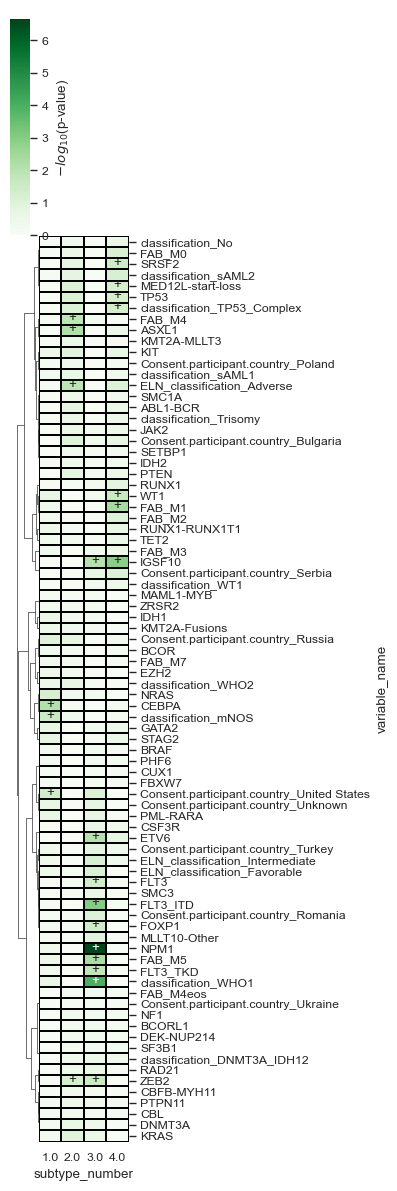

In [33]:
sns.clustermap(
    -1*np.log10(piv_results),
    annot=annotations,
    fmt='s',
    col_cluster=False,
    yticklabels=True,
    figsize=(4, 12),
    metric='correlation',
    cmap='Greens',
    linecolor='black',
    linewidths=0.003,
    cbar_kws=dict( label='$-log_{10}$(p-value)', use_gridspec=False,)
)

In [38]:
piv_results.columns.values

array([1., 2., 3., 4.])

In [ ]:
from statsmodels.stats.multitest import fdrcorrection
results['fdr_bh_sig'], results['fdr_bh'] = fdrcorrection(results.p_value)

In [71]:
results.loc[results.fdr_bh_sig].sort_values(['cluster_num_index', 'subtype_number'])

,cluster_num_index,subtype_number,variable_name,enrichment,p_value,fdr_bh_sig,fdr_bh
74,k=2,1.0,CEBPA,0.000,1.295e-04,True,3.109e-02
316,k=3,3.0,IGSF10,0.000,6.934e-06,True,6.254e-03
420,k=4,3.0,classification_WHO1,0.262,9.597e-05,True,2.664e-02
651,k=4,3.0,NPM1,0.070,2.275e-07,True,4.243e-04
1042,k=5,2.0,NPM1,0.070,1.569e-04,True,3.329e-02
748,k=5,3.0,classification_WHO1,0.117,6.082e-06,True,6.254e-03
989,k=5,3.0,IGSF10,0.000,1.379e-04,True,3.109e-02
1039,k=5,3.0,NPM1,0.000,2.352e-07,True,4.243e-04
1158,k=6,4.0,classification_WHO1,0.058,2.548e-05,True,1.366e-02
1509,k=6,4.0,NPM1,0.000,2.650e-05,True,1.366e-02


In [96]:
def create_plot(k=8):
    piv_results = results.loc[results.cluster_num_index == f'k={k}'].pivot(
        index='variable_name', columns='subtype_number', values='p_value').astype(float)
    print(piv_results.head())
    to_keep = piv_results[piv_results<0.05].count(axis=1)
    to_keep = to_keep[to_keep>0]
    print(to_keep)
    sig = piv_results.loc[to_keep.index]
    order_cols = piv_results.columns.values
    ordered_set = []
    for i in order_cols:
        tmp = sig[i].sort_values()
        for j in tmp[tmp<0.05].index:
            if j not in ordered_set:
                ordered_set.append(j)
                
    sig = sig.loc[ordered_set]
    sig.columns = sig.columns.astype(int)

    annotations = sig.copy()
    annot = sig<0.05
    annotations[~annot] = ''
    annotations[annot] = 'x'
    

    # Define two rows for subplots
    fig, (ax, cax) = plt.subplots(ncols=2, figsize=(2, 5), 
                                  gridspec_kw={"width_ratios":[1.0, .1]})


    g = sns.heatmap(
        -1*np.log10(sig),
        annot=annotations,
        fmt='s',
        yticklabels=True,

        ax=ax,

        cmap='Greens',
        linecolor='black',
        linewidths=0.01,
        cbar_kws={"orientation": "vertical", "pad": 0.05, "shrink": .82,
                  'label':'$-log_{10}$(p-value)', 'use_gridspec':False},
        cbar=False,

    )


    fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical",
                 label='$-log_{10}$(p-value)', pad = .5)
    ax.set_title(f'k={k}')
    plt.savefig(f'subtype_{k}_enrichment.pdf', bbox_inches='tight')
    plt.savefig(f'subtype_{k}_enrichment.png', bbox_inches='tight', dpi=300)

subtype_number    1.0    2.0    3.0
variable_name                      
ABL1-BCR        0.813  0.224  0.874
ASXL1           0.830  0.280  0.670
BCOR            0.437  0.870  0.911
BCORL1          0.437  0.413  1.000
BRAF            0.437  1.000  0.495
variable_name
CEBPA                                        1
Consent.participant.country_United States    1
FAB_M1                                       1
FAB_M2                                       1
FAB_M4                                       1
IGSF10                                       1
NPM1                                         1
SRSF2                                        1
WT1                                          1
ZEB2                                         1
classification_mNOS                          1
dtype: int64


meta NOT subset; don't know how to subset; dropped


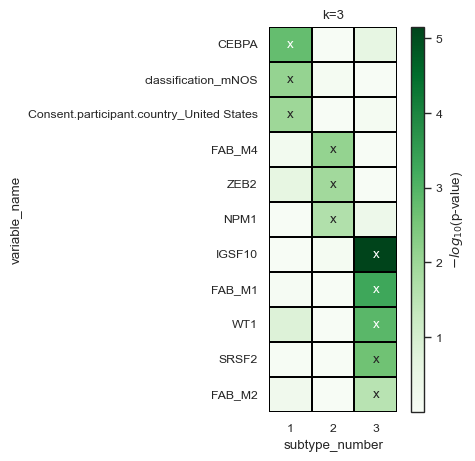

In [97]:
create_plot(k=3)

subtype_number    1.0    2.0    3.0    4.0    5.0
variable_name                                    
ABL1-BCR        0.218  0.267  0.990  0.256  0.956
ASXL1           0.927  0.342  0.993  0.323  0.013
BCOR            0.644  0.969  0.946  0.674  0.621
BCORL1          0.644  0.682  1.000  0.674  0.621
BRAF            0.644  0.682  0.592  0.674  1.000
variable_name
ASXL1                                        1
CEBPA                                        2
Consent.participant.country_Bulgaria         1
Consent.participant.country_Turkey           1
Consent.participant.country_United States    1
DNMT3A                                       1
ELN_classification_Adverse                   1
ELN_classification_Favorable                 1
ELN_classification_Intermediate              1
ETV6                                         1
FAB_M1                                       1
FAB_M4                                       1
FAB_M5                                       1
FLT3_ITD                 

meta NOT subset; don't know how to subset; dropped


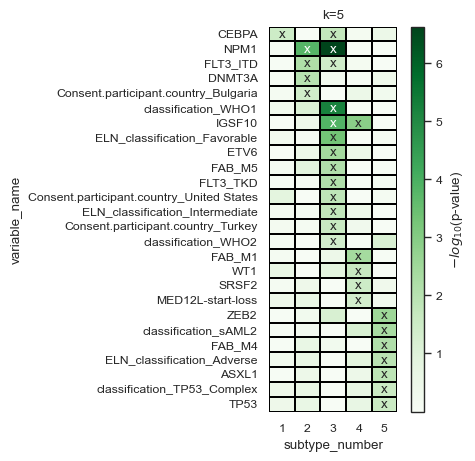

In [98]:
create_plot(k=5)

subtype_number    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0
variable_name                                                         
ABL1-BCR        0.311  0.958  0.349  1.000  0.603  0.391  0.470  0.421
ASXL1           0.975  0.610  0.062  0.998  0.611  0.561  0.136  0.102
BCOR            0.714  0.986  0.738  0.706  0.995  0.762  0.804  0.779
BCORL1          0.714  1.000  0.738  0.706  0.864  0.762  0.804  0.779
BRAF            0.714  0.779  0.738  0.706  0.864  0.762  0.804  1.000
variable_name
DNMT3A                             1
ELN_classification_Adverse         1
ELN_classification_Favorable       1
ELN_classification_Intermediate    1
ETV6                               1
FAB_M1                             1
FAB_M2                             2
FAB_M4                             1
FAB_M5                             1
FLT3_ITD                           2
IDH2                               1
IGSF10                             3
NPM1                               3
ZEB2    

meta NOT subset; don't know how to subset; dropped


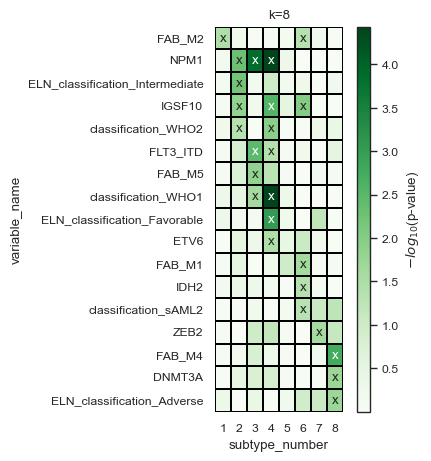

In [99]:
create_plot(k=8)